## 2. Plot mAP results for nELISA vs Cell Painting

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from map_utils.plot import set_plotting_style, plot_map_x3, add_corner_text_annotations

In [2]:
set_plotting_style()

## Plot phenotypic activity

In [3]:
cp_act_map = pd.read_csv("outputs/cp_map_activity_results.csv")
ne_act_map = pd.read_csv("outputs/ne_map_activity_results.csv")
print(cp_act_map.shape, ne_act_map.shape)

(300, 7) (300, 7)


In [4]:
cp_act_map["Assay"] = "Cell Painting"
ne_act_map["Assay"] = "nELISA"

tech_map = pd.concat([cp_act_map, ne_act_map])
tech_map["-log10(mAP p-value)"] = -np.log10(tech_map["corrected_p_value"])
tech_map.rename(
    columns={"mean_average_precision": "mAP", "below_corrected_p": "p < 0.05"},
    inplace=True,
)
tech_map

,Metadata_broad_sample,mAP,p_value,corrected_p_value,below_p,p < 0.05,-log10(mAP p-value),Assay
0,BRD-A00827783-001-24-6,0.432287,0.011260,0.017235,True,True,1.763601,Cell Painting
1,BRD-A01078468-001-14-8,0.522666,0.003860,0.006617,True,True,2.179334,Cell Painting
2,BRD-A07207424-001-14-0,0.573214,0.002600,0.004643,True,True,2.333219,Cell Painting
3,BRD-A08187463-001-12-9,0.518849,0.004080,0.006954,True,True,2.157736,Cell Painting
4,BRD-A09722536-002-18-0,0.211931,0.086609,0.096590,False,False,1.015067,Cell Painting
...,...,...,...,...,...,...,...,...
295,BRD-K97091514-001-11-4,0.074625,0.434676,0.464067,False,False,0.333420,nELISA
296,BRD-K97181089-003-24-7,0.060519,0.578984,0.592484,False,False,0.227323,nELISA
297,BRD-K98357249-001-02-9,0.094346,0.311017,0.349457,False,False,0.456606,nELISA
298,BRD-K98763141-001-30-8,0.068006,0.495605,0.519865,False,False,0.284109,nELISA


/dgx1nas1/storage/data/akalinin/projects/map/map_utils/plot.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


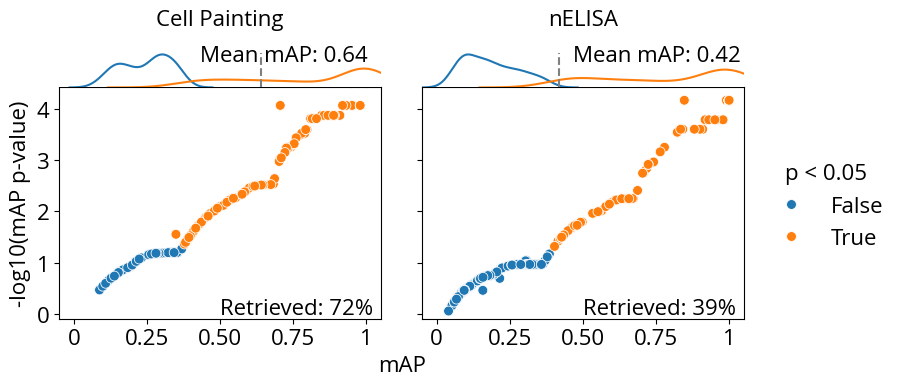

In [5]:
plot_map_x3(tech_map, "Assay", "", pr_x=0.5, pr_y=0.02, m_x=0.52, m_y=0.02, kde_y=0.75)

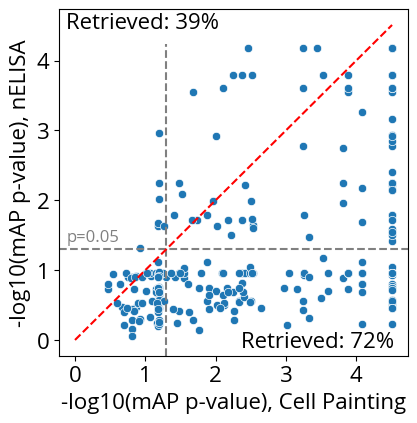

In [6]:
tech_map_compare = tech_map.pivot(
    index="Metadata_broad_sample", columns="Assay", values="-log10(mAP p-value)"
).reset_index()

plt.figure(figsize=(4.5, 4.5))
ax = sns.scatterplot(data=tech_map_compare, x="Cell Painting", y="nELISA")
ax.axhline(-np.log10(0.05), color="grey", linestyle="--")
ax.axvline(-np.log10(0.05), ymax=0.9, color="grey", linestyle="--")
ax.text(
    0.02,
    -np.log10(0.05) / tech_map_compare["nELISA"].max() + 0.02,
    "p=0.05",
    transform=ax.transAxes,
    color="grey",
    fontsize=12,
    fontstyle="italic",
)

plt.xlabel("-log10(mAP p-value), Cell Painting")
plt.ylabel("-log10(mAP p-value), nELISA")

lims = [
    0,  # lower limit
    max(tech_map_compare["Cell Painting"].max(), tech_map_compare["nELISA"].max()),
]
plt.plot(lims, lims, "r--")

add_corner_text_annotations(
    ax,
    tech_map_compare,
    "nELISA",
    "Cell Painting",
    prefix="Retrieved: ",
    h_offset=0.02,
    v_offset=0.01,
)

## Plot phenotypic consistency

(413, 7) (413, 7)


/dgx1nas1/storage/data/akalinin/projects/map/map_utils/plot.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


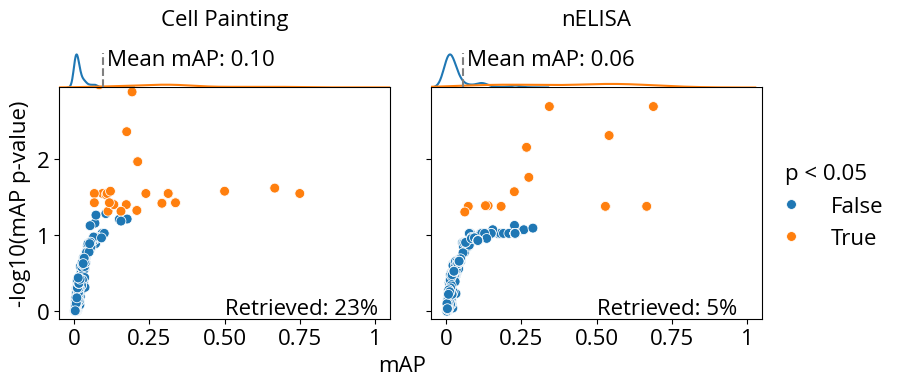

In [7]:
cp_all_map_consistency_results = pd.read_csv(
    "outputs/cp_all_map_consistency_results.csv"
)
ne_all_map_consistency_results = pd.read_csv(
    "outputs/ne_all_map_consistency_results.csv"
)
print(cp_all_map_consistency_results.shape, ne_all_map_consistency_results.shape)

cp_all_map_consistency_results["Assay"] = "Cell Painting"
ne_all_map_consistency_results["Assay"] = "nELISA"

bio_map_all = pd.concat(
    [cp_all_map_consistency_results, ne_all_map_consistency_results]
)
bio_map_all["-log10(mAP p-value)"] = -np.log10(bio_map_all["corrected_p_value"])
bio_map_all.rename(
    columns={"mean_average_precision": "mAP", "below_corrected_p": "p < 0.05"},
    inplace=True,
)

plot_map_x3(
    bio_map_all, "Assay", "", pr_x=0.5, pr_y=0.02, m_x=0.52, m_y=0.02, kde_y=0.65
)

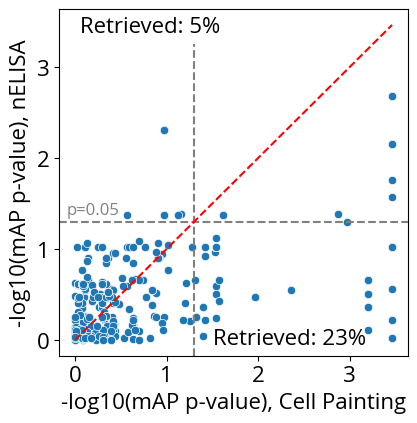

In [8]:
bio_map_compare = bio_map_all.pivot(
    index="Metadata_target", columns="Assay", values="-log10(mAP p-value)"
).reset_index()

plt.figure(figsize=(4.5, 4.5))
ax = sns.scatterplot(data=bio_map_compare, x="Cell Painting", y="nELISA")
ax.axhline(-np.log10(0.05), color="grey", linestyle="--")
ax.axvline(-np.log10(0.05), ymax=0.9, color="grey", linestyle="--")
ax.text(
    0.02,
    -np.log10(0.05) / bio_map_compare["nELISA"].max() - 0.075,
    "p=0.05",
    transform=ax.transAxes,
    color="grey",
    fontsize=12,
    fontstyle="italic",
)

plt.xlabel("-log10(mAP p-value), Cell Painting")
plt.ylabel("-log10(mAP p-value), nELISA")

lims = [
    0,  # lower limit
    max(bio_map_compare["Cell Painting"].max(), bio_map_compare["nELISA"].max()),
]
plt.plot(lims, lims, "r--")

add_corner_text_annotations(
    ax,
    bio_map_compare,
    "nELISA",
    "Cell Painting",
    prefix="Retrieved: ",
    h_offset=0.06,
    v_offset=0.02,
)